In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib  import cm
import h5py
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [2]:
data_size=(41,3000)
epsi = 0.01
sig = 0.1
sigma1 = 1

In [3]:
with h5py.File('./data/2BB_xy_1200_samples_enpredeesti%d.h5'% (10*sigma1), "r") as hf:
    dataset = hf['dataset'][:]
hf.close()
dataset010 = dataset[:,0:11,:]

In [4]:
#read 11-20 data
with h5py.File('./data/2B_pre_20_%d.h5'% (10*sigma1), 'r') as hf:
    pre_decoder = hf['pre_20'][:]
hf.close()
pre1020 = pre_decoder[:,:,:]

#read 21-30 data
with h5py.File('./data/2B_pre_30_%d.h5'% (10*sigma1), 'r') as hf:
    pre_decoder = hf['pre_30'][:]
hf.close()
pre2030 = pre_decoder[:,:,:]

#read pre_decoder data
with h5py.File('./data/2B_pre_40_%d.h5'% (10*sigma1), 'r') as hf:
    pre_decoder = hf['pre_40'][:]
hf.close()
pre3040 = pre_decoder[:,:,:]
pre_1 = pre_decoder[:,-1,:].reshape(-1,2)#40

In [5]:
dpre_1 = pd.DataFrame(pre_1,columns=['x', 'y'])
dpre_11 = dpre_1[ dpre_1['x'] >= -4]
dpre_12 = dpre_11[ dpre_11['x'] < 4].sort_values(by='x',ascending=False)

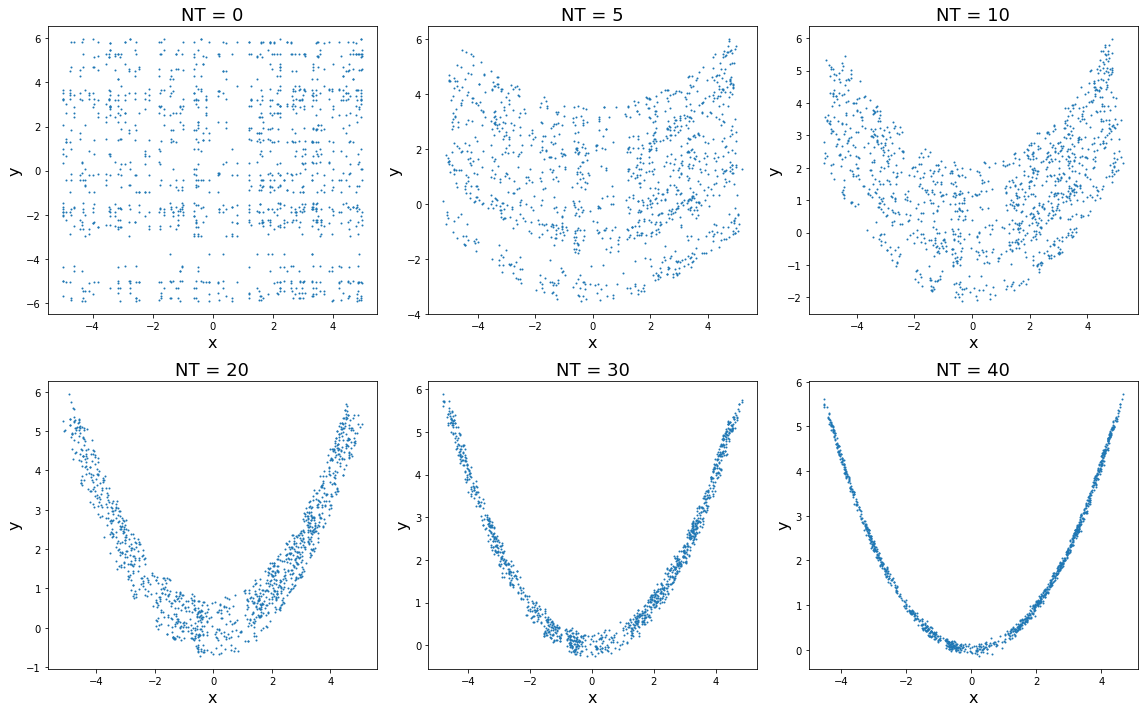

In [6]:
X0 = dataset[:,0,:].reshape(-1,2)
X5 = dataset[:,5,:].reshape(-1,2)
X10 = dataset[:,10,:].reshape(-1,2)
X20 = pre1020[:,-1,:].reshape(-1,2)
X30 = pre2030[:,-1,:].reshape(-1,2)
X40 = pre3040[:,-1,:].reshape(-1,2)

xt0 = X0[:,0]
yt0 = X0[:,1]
xt5 = X5[:,0]
yt5 = X5[:,1]
xt10 = X10[:,0]
yt10 = X10[:,1]
xt20 = X20[:,0]
yt20 = X20[:,1]
xt30 = X30[:,0]
yt30 = X30[:,1]
xt40 = X40[:,0]
yt40 = X40[:,1]


fig, ax = plt.subplots(2, 3,figsize=(16,10))

ax[0,0].set_title("NT = 0",fontsize=18)
ax[0,0].set_xlabel("x",fontsize=16)
ax[0,0].set_ylabel("y",fontsize=16)
ax[0,0].scatter(xt0,yt0,s=1)

ax[0,1].set_title("NT = 5",fontsize=18)
ax[0,1].set_xlabel("x",fontsize=16)
ax[0,1].set_ylabel("y",fontsize=16)
ax[0,1].scatter(xt5,yt5,s=1)

ax[0,2].set_title("NT = 10",fontsize=18)
ax[0,2].set_xlabel("x",fontsize=16)
ax[0,2].set_ylabel("y",fontsize=16)
ax[0,2].scatter(xt10,yt10,s=1)

ax[1,0].set_title("NT = 20",fontsize=18)
ax[1,0].set_xlabel("x",fontsize=16)
ax[1,0].set_ylabel("y",fontsize=16)
ax[1,0].scatter(xt20,yt20,s=1)

ax[1,1].set_title("NT = 30",fontsize=18)
ax[1,1].set_xlabel("x",fontsize=16)
ax[1,1].set_ylabel("y",fontsize=16)
ax[1,1].scatter(xt30,yt30,s=1)

ax[1,2].set_title("NT = 40",fontsize=18)
ax[1,2].set_xlabel("x",fontsize=16)
ax[1,2].set_ylabel("y",fontsize=16)
ax[1,2].scatter(xt40,yt40,s=1)
plt.tight_layout()

#fig.savefig("image/2B_snaps.pdf", dpi=900,format='pdf')

In [7]:
x = dpre_12.values[:,0]
y = dpre_12.values[:,1]

poly_reg =PolynomialFeatures(degree=2) #二次多项式
X_ploy =poly_reg.fit_transform(x[:, np.newaxis])
lin_reg_1=linear_model.LinearRegression()
lin_reg_1.fit(X_ploy,y)
predict_y =  lin_reg_1.predict(X_ploy)

print("coefficients", lin_reg_1.coef_)
print("intercept", lin_reg_1.intercept_)

coefficients [ 0.         -0.0134365   0.26227787]
intercept -0.032388687


Text(0, 0.5, 'y')

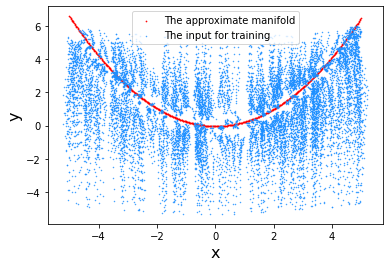

In [8]:
xp = np.linspace(-5,5,500)
yp = lin_reg_1.intercept_+lin_reg_1.coef_[1]*xp+lin_reg_1.coef_[2]*xp**2
plt.scatter(xp,yp,s=0.5,c='red',label='The approximate manifold')
find = dataset[:,1:11,:].reshape(-1,2)
xf = find[:,0]
yf = find[:,1]
plt.scatter(xf,yf,s=0.2,c='dodgerblue',label='The input for training')
plt.legend(loc='best')
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)

#plt.savefig("image/2B_in_mld.pdf", dpi=900,format='pdf')

In [9]:
df_xweidd1 = pd.read_csv('./data/2B_200000samples_xweight%d' %(10*sigma1))
xweidd1 = df_xweidd1.values
xdrift1 = xweidd1[0,:]
xdiff1 = abs(xweidd1[1,:])

In [10]:
XT = 4
def GeneratingData(T, dt, n_samples):
    X0 = np.random.uniform(-XT,XT,1)
    X0 = X0.repeat(n_samples)
    Y1 = lin_reg_1.intercept_+lin_reg_1.coef_[1]*X0+lin_reg_1.coef_[2]*X0**2
    Y0 = Y1
    
    t = np.arange(0, T+dt, dt)
    NT = len(t)
    x0 = X0[:]
    y0 = Y0[:]
    N = len(x0)
    x = np.zeros((NT, N))
    y = np.zeros((NT, N))
    xNN = np.zeros((NT, N))
    x[0, :] = x0.squeeze()
    y[0, :] = y0.squeeze()
    xNN[0, :] = x0.squeeze()
    
    for i in range(NT-1):
        UUt = dt**(1/2) * np.random.randn(N)
        VVt = dt**(1/2) * np.random.randn(N)
        x[i+1, :] = x[i, :] + (1*x[i, :] - x[i,:]*y[i, :])*dt + 0*x[i, :]*UUt+ 1*UUt
        y[i+1, :] = y[i, :] + (-1/epsi*y[i, :] + 1/(4*epsi)*x[i, :]**2)*dt + 0*y[i, :]*VVt + sig*epsi**(-1/2)*VVt
        
        bas0 = np.ones(xNN[i, :].shape)
        bas1 = xNN[i, :]
        bas2 = lin_reg_1.intercept_*bas0+lin_reg_1.coef_[1]*xNN[i, :]+lin_reg_1.coef_[2]*xNN[i,:]**2
        bas3 = bas1**2
        bas4 = bas1*bas2
        bas5 = bas2**2
        basfuc = np.stack((bas0,bas1,bas2,bas3,bas4,bas5),0)
        xNNdri = np.zeros(bas1.shape)
        xNNdif = np.zeros(bas1.shape)
        for ii in range(6):
            xNNdri += xdrift1[ii]*basfuc[ii]
            xNNdif += xdiff1[ii]*basfuc[ii]
        xNN[i+1, :] = xNN[i, :] + xNNdri*dt + xNNdif*UUt
        
    return x, xNN

In [11]:
T = 1
dt = 0.001
n_samples = 1000
xo, xNN = GeneratingData(T, dt, n_samples)
t = np.arange((T+dt)/dt)

Text(0, 0.5, 'x')

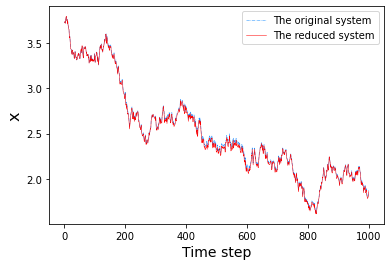

In [12]:
plt.plot(t,xo[:,66],linewidth=0.5,c='dodgerblue',linestyle='-.',label='The original system')
plt.plot(t,xNN[:,66],linewidth=0.5,c='red',label='The reduced system')
plt.legend(loc='best')
plt.xlabel('Time step',fontsize=14)
plt.ylabel('x',fontsize=16)

#plt.savefig("image/2B_reds.pdf", dpi=900,format='pdf')

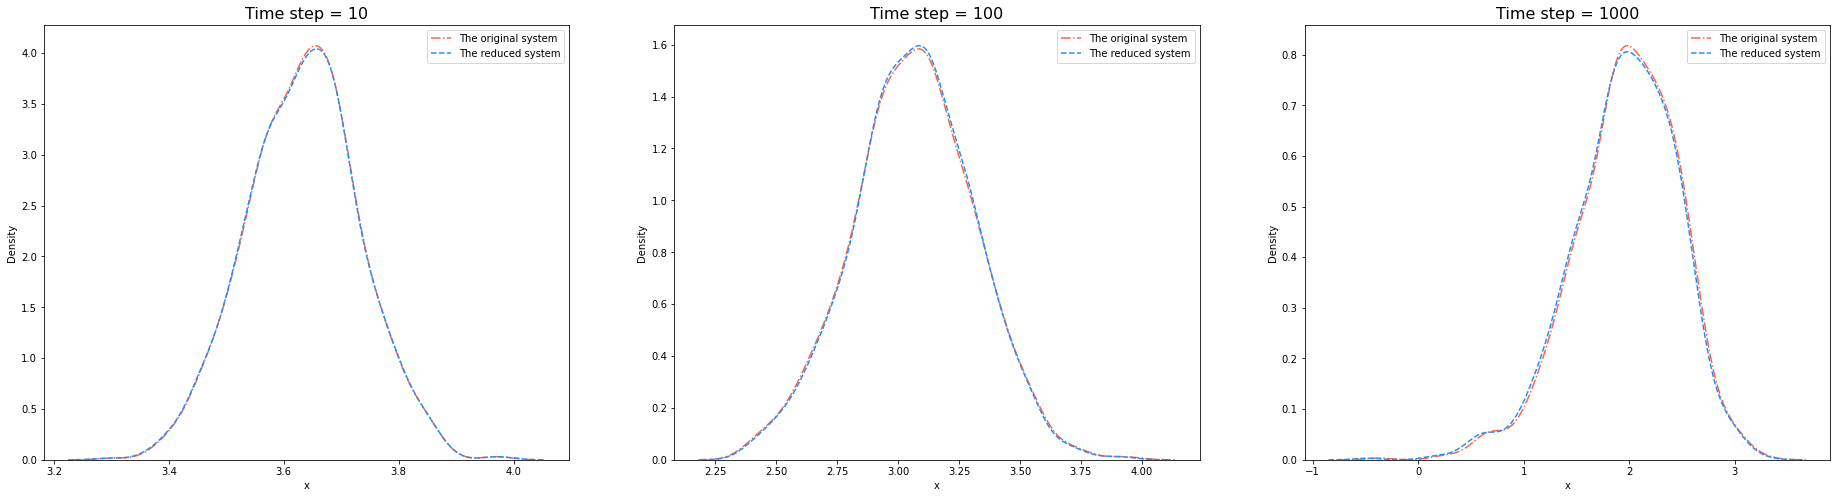

In [13]:
fig, axes = plt.subplots(1,3,figsize=(32,8))
sns.kdeplot(xo[10,:],color="tomato",label='The original system',linestyle='-.',ax = axes[0])
sns.kdeplot(xNN[10,:],color="dodgerblue",label='The reduced system',linestyle='--',ax = axes[0])
axes[0].legend()

sns.kdeplot(xo[100,:],color="tomato",label='The original system',linestyle='-.',ax = axes[1])
sns.kdeplot(xNN[100,:],color="dodgerblue",label='The reduced system',linestyle='--',ax = axes[1])
axes[1].legend()

sns.kdeplot(xo[1000,:],color="tomato",label='The original system',linestyle='-.',ax = axes[2])
sns.kdeplot(xNN[1000,:],color="dodgerblue",label='The reduced system',linestyle='--',ax = axes[2])

axes[0].set_title("Time step = 10",fontsize=16)
axes[1].set_title("Time step = 100",fontsize=16)
axes[2].set_title("Time step = 1000",fontsize=16)
axes[0].set_xlabel('x')
axes[1].set_xlabel('x')
axes[2].set_xlabel('x')

plt.legend()

#fig.savefig("image/2B_reopdf.pdf", dpi=900,format='pdf')